In [1]:
import numpy as np
from chaos_game import *
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [2]:
params = {
    'figure.figsize': (11,28),
}
plt.rcParams.update(params)

# Number of points to construct
N = int(1e5)
# size of the final image
size = 512
# interval between frames when rendering the animation
interval = 100

## Sierpinski triangle

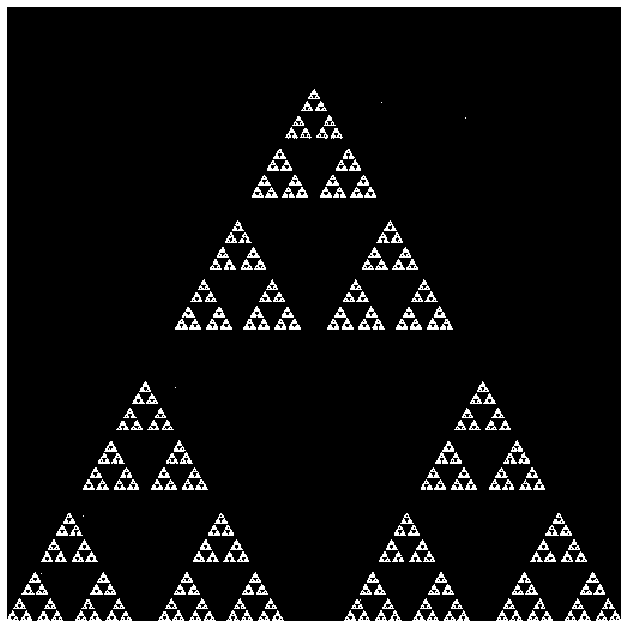

In [3]:
w = 0.55
# Three corners of an equilateral triangle
corners = [(0, 0), (0.5, np.sqrt(3)/2), (1, 0)]

x, y = play_game(N, w, corners)
im = render_image(x, y, size)
plt.axis('off')
plt.imshow(im)

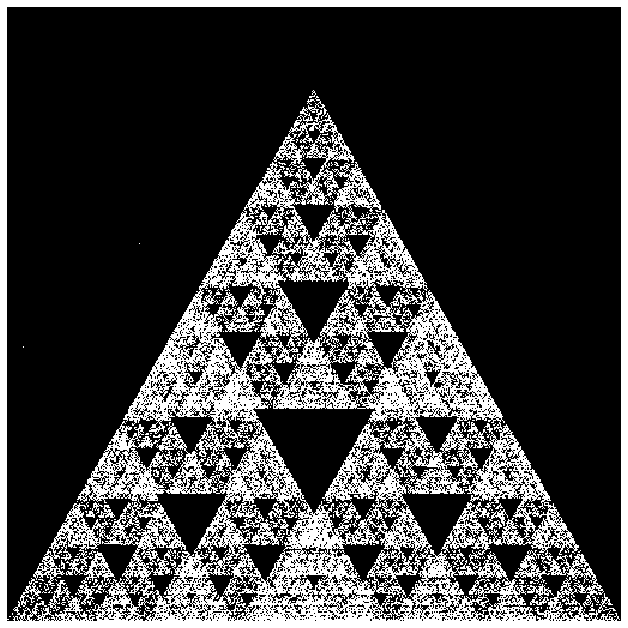

In [4]:
w = 0.4
# Three corners of an equilateral triangle
corners = [(0, 0), (0.5, np.sqrt(3)/2), (1, 0)]

x, y = play_game(N, w, corners)
im = render_image(x, y, size)
plt.axis('off')
plt.imshow(im)

## Animation : Sierpinski triangle with varying midpoint weight

In [5]:
fig = plt.figure()

frames = 50
w = np.linspace(0.3, 0.7, frames)

x, y = play_game(N, w[0], corners)
im = plt.imshow(render_image(x, y, size), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w[0], corners)
    im.set_data( render_image(x, y, size))
    return [im]

def animate(i):
    x, y = play_game(N, w[i], corners)
    im.set_data( render_image(x, y, size))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

In [6]:
# anim.save('triangle_varying_weights.gif', writer='imagemagick', fps=30)

## Sierpinski square

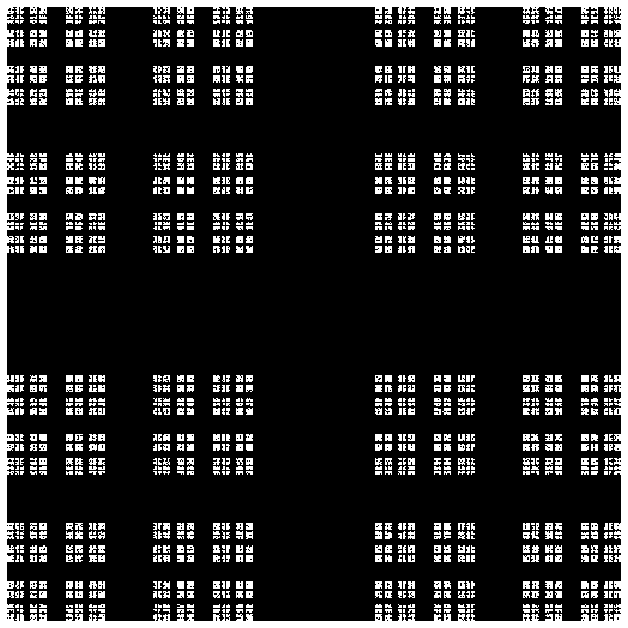

In [5]:
w = 0.60
# Four corners of a square
corners = [(0, 0), (1, 1), (1,0), (0,1)]

x, y = play_game(N, w, corners)
im = render_image(x, y, size)

plt.axis('off')
plt.imshow(im)

## In a Swedish mood

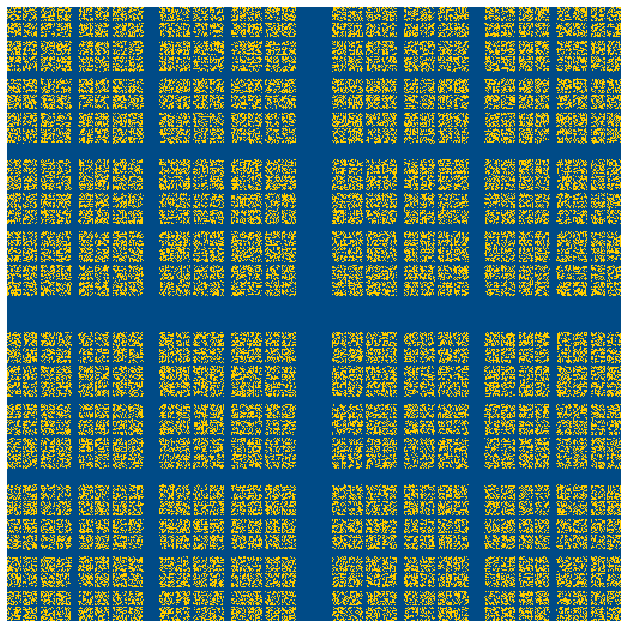

In [7]:
w = 0.53
# Four corners of a square
corners = [(0, 0), (1, 1), (1,0), (0,1)]

bg = (0, 75, 135)
fg = (255, 205, 0)

x, y = play_game(N, w, corners)
im = render_image(x, y, size, bg=bg, fg=fg)

plt.axis('off')
plt.imshow(im)

## Animation : Sierpinski square with varying midpoint weight

In [28]:
fig = plt.figure()

corners = [(0, 0), (0,1), (1,1), (1,0)]

frames = 25
w = np.linspace(0.45, 0.7, frames)

x, y = play_game(N, w[0], corners)
im = plt.imshow(render_image(x, y, size), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w[0], corners)
    im.set_data( render_image(x, y, size))
    return [im]

def animate(i):
    x, y = play_game(N, w[i], corners)
    im.set_data( render_image(x, y, size))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

In [29]:
# anim.save('square_varying_weights.gif', writer='imagemagick', fps=30)

## Sierpinski pentagon

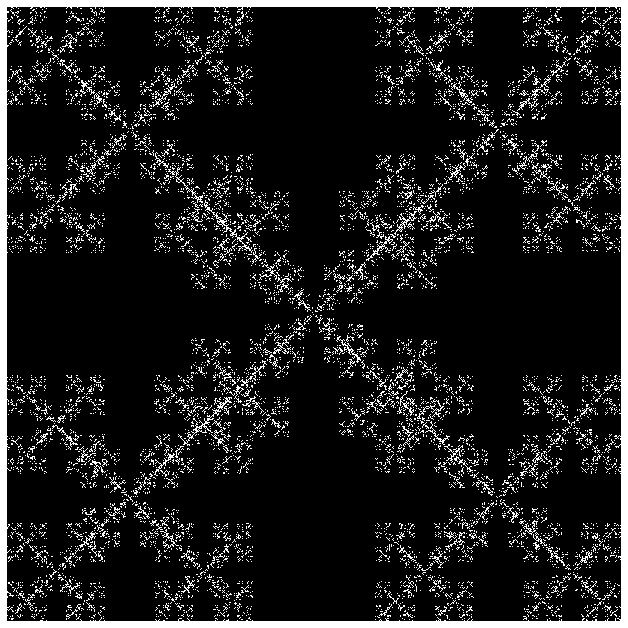

In [10]:
w = 0.6
# Five corners of a pentagon
corners = [(0, 0), (0,1), (1,1), (1,0), (0.5, 0.5)]

x, y = play_game(N, w, corners)
im = render_image(x, y, size)
plt.axis('off')
plt.imshow(im)

## Animation : Sierpinski pentagon with varying midpoint weight

In [11]:
fig = plt.figure()

corners = [(0, 0), (0,1), (1,1), (1,0), (0.5, 0.5)]

frames = 50
w = np.linspace(0.4, 0.7, frames)

x, y = play_game(N, w[0], corners)
im = plt.imshow(render_image(x, y, size), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w[0], corners)
    im.set_data( render_image(x, y, size))
    return [im]

def animate(i):
    x, y = play_game(N, w[i], corners)
    im.set_data( render_image(x, y, size))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

In [12]:
# anim.save('pentagon_varying_weights.gif', writer='imagemagick', fps=30)

## Rotating Sierpinski Triangle

In [31]:
omega = (0.5, np.sqrt(3)/6)
r = np.sqrt(3)/3

def rotate(theta):
    x = omega[0]+r*np.cos(theta-5*np.pi/6)
    y = omega[1]+r*np.sin(theta-5*np.pi/6)
    if x < 1e-12:
        x = 0.0
    if x > 1 - 1e-12:
        x = 1.0
    if y < 1e-12:
        y = 0.0
    if y > 1 - 1e-12:
        y = 1.0
    return (x, y)

In [38]:
fig = plt.figure()

corners = [rotate(2*np.pi*k/3) for k in range(3)]
w = 0.5

frames = 80

x, y = play_game(N, w, corners)
im = plt.imshow(render_image(x, y, size), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w, corners)
    im.set_data( render_image(x, y, size))
    return [im]

def animate(i):
    phi = 2*np.pi*i/frames
    corners = [rotate(2*np.pi*k/3+phi) for k in range(3)]
    x, y = play_game(N, w, corners)
    im.set_data( render_image(x, y, size))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

In [39]:
# anim.save('rotating_sierpinski_triangle.gif', writer='imagemagick', fps=30)

## Both at the same time!

In [16]:
fig = plt.figure()

corners = [rotate(2*np.pi*k/3) for k in range(3)]

frames = 80

w = np.linspace(0.40, 0.6, int(frames/5))
# During the animation, use this trick to iterate over w in a 
# back-and-forth fashion
j = 0
w_reflected = []
for _ in range(frames):
    w_reflected.append(w[j])
    if(j>=len(w)-1):
        w = w[::-1]
        j = 1
    else:
        j += 1
        
x, y = play_game(N, w[0], corners)
im = plt.imshow(render_image(x, y, size), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w[0], corners)
    im.set_data( render_image(x, y, size))
    return [im]

def animate(i):
    phi = 2*np.pi*i/frames
    corners = [rotate(2*np.pi*k/3+phi) for k in range(3)]
    x, y = play_game(N, w_reflected[i], corners)
    im.set_data( render_image(x, y, size))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

In [17]:
# anim.save('rotating_weighted_sierpinski_triangle.gif', writer='imagemagick', fps=30)

## Rotating Swedish flag

In [50]:
omega = (0.5, 0.5)
r = 0.4

def rotate(theta):
    x = omega[0]+r*np.cos(theta)
    y = omega[1]+r*np.sin(theta)
    if x < 1e-12:
        x = 0.0
    if x > 1 - 1e-12:
        x = 1.0
    if y < 1e-12:
        y = 0.0
    if y > 1 - 1e-12:
        y = 1.0
    return (x, y)

In [8]:
fig = plt.figure()

bg = (0, 75, 135)
fg = (255, 205, 0)

corners = [rotate(2*np.pi*k/4) for k in range(4)]
w = 0.53

frames = 30

x, y = play_game(N, w, corners)
im = plt.imshow(render_image(x, y, size, bg=bg, fg=fg), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w, corners)
    im.set_data( render_image(x, y, size, bg=bg, fg=fg))
    return [im]

def animate(i):
    phi = 2*np.pi*i/frames
    corners = [rotate(2*np.pi*k/4+phi) for k in range(4)]
    x, y = play_game(N, w, corners)
    im.set_data( render_image(x, y, size, bg=bg, fg=fg))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

NameError: name 'rotate' is not defined

<Figure size 792x2016 with 0 Axes>

In [45]:
# anim.save('swedish_rotate.gif', writer='imagemagick')

## Swedish madness

In [51]:
fig = plt.figure()

bg = (0, 75, 135)
fg = (255, 205, 0)

corners = [rotate(2*np.pi*k/4) for k in range(4)]

frames = 50

w = np.linspace(0.45, 0.65, int(frames/5))
# During the animation, use this trick to iterate over w in a 
# back-and-forth fashion
j = 0
w_reflected = []
for _ in range(frames):
    w_reflected.append(w[j])
    if(j>=len(w)-1):
        w = w[::-1]
        j = 1
    else:
        j += 1
        
x, y = play_game(N, w[0], corners)
im = plt.imshow(render_image(x, y, size, bg=bg, fg=fg), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w[0], corners)
    im.set_data( render_image(x, y, size, bg=bg, fg=fg))
    return [im]

def animate(i):
    phi = 2*np.pi*i/frames
    corners = [rotate(2*np.pi*k/4+phi) for k in range(4)]
    x, y = play_game(N, w_reflected[i], corners)
    im.set_data( render_image(x, y, size, bg=bg, fg=fg))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

In [52]:
# anim.save('swedish_madness.gif', writer='imagemagick')`